# Decsription

The dataset contains catch per unit effort data of commercial horsehair crab landings in the Alaskan Eastern Bering Sea. The catch per unit effort is an indirect measure of the abundance of a target species. Dataset consists of 2800 rows and 11 colums.
Tabular data includes:

- Latitude: The latitude (decimal degrees) at the start of the haul.
- Longitude: The longitude (decimal degrees) at the start of the haul.
- Year: Year specimen was collected.
- Name: The common name of the marine organism associated with the scientific name.
- Maturity: Gender of crab.
- Bottom Depth: Meters (m). Weighted average depth (m) and is calculated by adding gear depth to net height.
- Surface Temperature: Surface temperature, in tenths of a degree, Celsius.
- Bottom Temperature: Average temperature (in tenths of a degree Celsius) measured at the maximum depth of the trawl.
- Haul: This number uniquely identifies a haul within a cruise. It is a sequential number, in chronological order of occurrence.
- CPUE: Catch per unit effort. Catch number per area the net swept in number/square nautical mile.

# Goals and Objectives

- Explore the Crab Catch Dataset
- Prepare your data
- Conduct exploratory data analysis (histogram, correlation matrix, scatterplot).
- Run a machine learning algorithm to analyze the data
- Executing a neural network for data analysis (MPL model LSTM model
- Make conclusions.

# Import Libraries

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



In [170]:
url = 'C:/Users/svinj/Downloads/archive (1)/horsehaircrab.csv'
data = pd.read_csv(url)
data

,id,latitude,longitude,year,name,maturity,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,187445,57.33959,-164.00767,1980,hair crab,Total female,60,3.2,1.5,28,113
1,187446,57.33675,-160.91067,1980,hair crab,Total female,64,1.7,1.4,55,105
2,187447,57.33583,-168.94117,1980,hair crab,Total female,71,5.7,3.4,103,195
3,187448,57.33400,-170.21267,1980,hair crab,Total female,53,5.3,5.1,60,9875
4,188334,55.34417,-163.42834,1980,hair crab,Total female,51,NaN,NaN,42,858
...,...,...,...,...,...,...,...,...,...,...,...
2796,193782,58.01029,-165.26021,2018,hair crab,Total female,50,7.8,4.4,51,70
2797,193783,58.00878,-160.21655,2018,hair crab,Total female,51,6.6,4.4,8,72
2798,193785,58.65994,-167.87462,2018,hair crab,Total female,47,7.8,4.4,84,135
2799,193786,58.68202,-169.15643,2018,hair crab,Total female,63,7.6,3.8,97,78


In [171]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2801 non-null   int64  
 1   latitude             2801 non-null   float64
 2   longitude            2801 non-null   float64
 3   year                 2801 non-null   int64  
 4   name                 2801 non-null   object 
 5   maturity             2801 non-null   object 
 6   bottom_depth         2801 non-null   int64  
 7   surface_temperature  2756 non-null   float64
 8   bottom_temperature   2681 non-null   float64
 9   haul                 2801 non-null   int64  
 10  cpue                 2801 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 240.8+ KB
None


In [172]:
data.columns = data.columns.str.strip()

In [173]:
print(data.columns)

Index(['id', 'latitude', 'longitude', 'year', 'name', 'maturity',
       'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul',
       'cpue'],
      dtype='object')


# Remove rows with NaN values

In [174]:
data.dropna(inplace=True)

# Handling outliers (using Z-score)

In [175]:
z_scores = zscore(data[['latitude', 'longitude', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul', 'cpue']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Data normalization/standardization (Example: Min-Max scaling)

In [176]:
scaler = MinMaxScaler()

# Specify the columns you want to scale
columns_to_scale = ['latitude', 'longitude', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul', 'cpue']

# Use .loc to explicitly modify the original DataFrame
data.loc[:, columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Extract only numeric columns for correlation analysis

In [177]:
numeric_data = data.select_dtypes(include='number')

# Encode the 'maturity' column

In [179]:
label_encoder = LabelEncoder()
data.loc[:, 'maturity_encoded'] = label_encoder.fit_transform(data['maturity'])

# Exploratory Data Analysis
# Histograms for numerical features

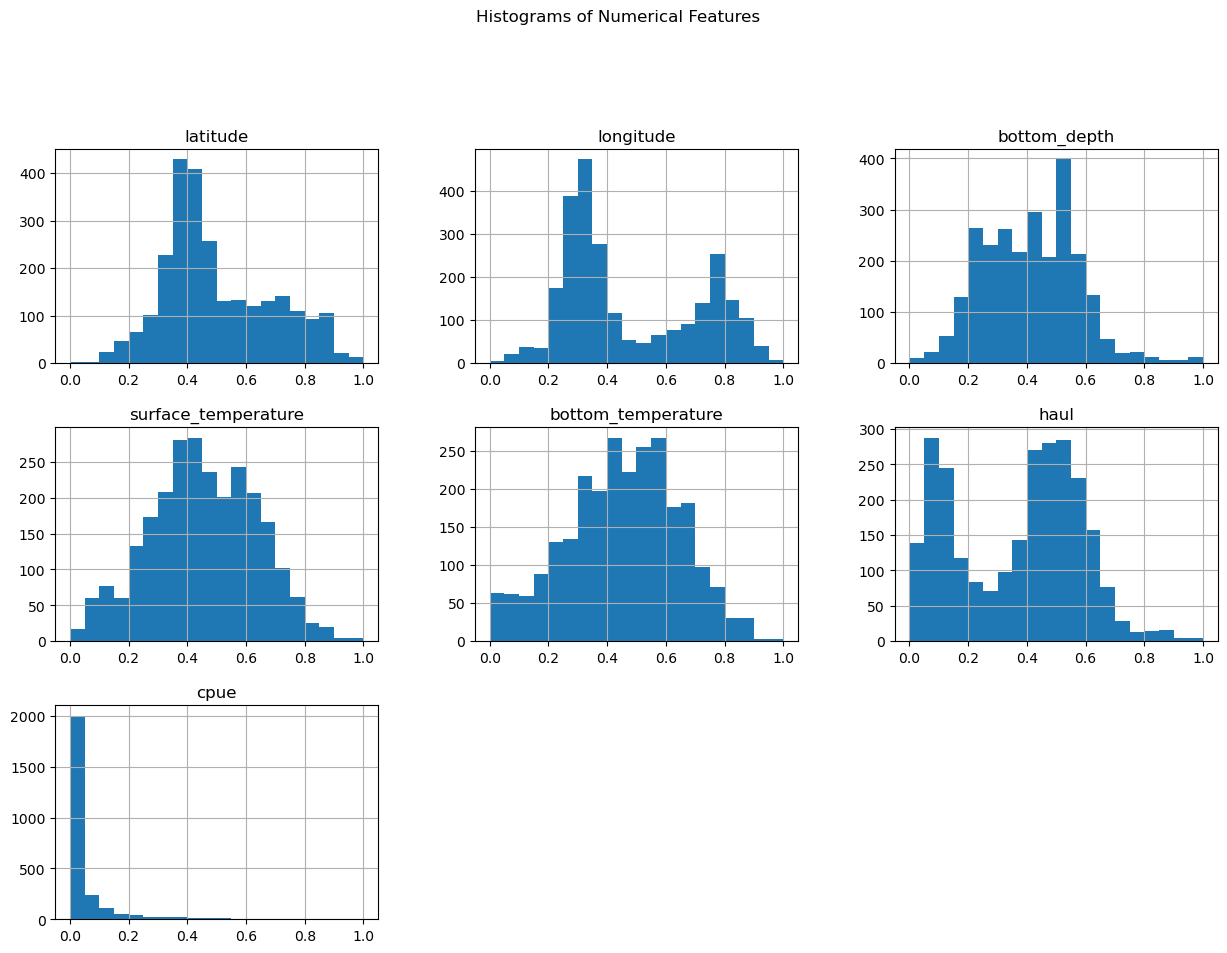

In [180]:
numerical_columns = ['latitude', 'longitude', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul', 'cpue']
data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

# Scatter plots

In [181]:
scatter_columns = ['latitude', 'longitude', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul', 'cpue']


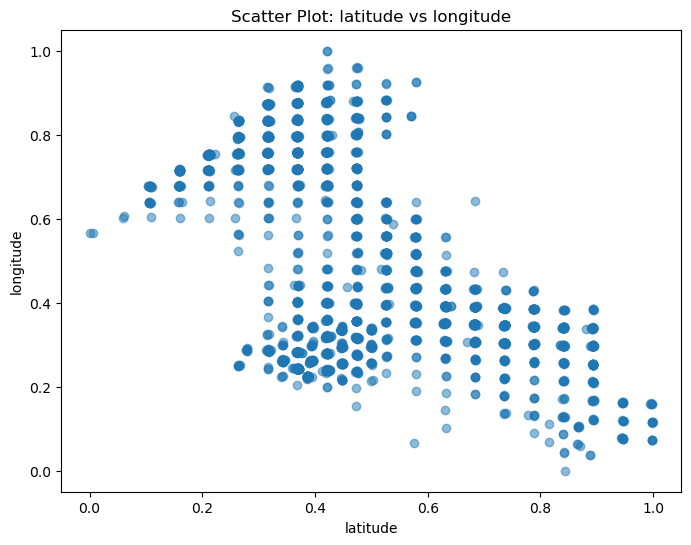

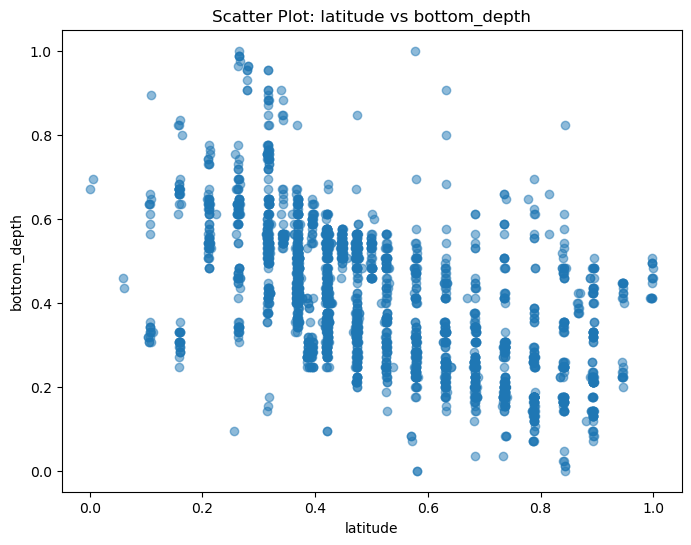

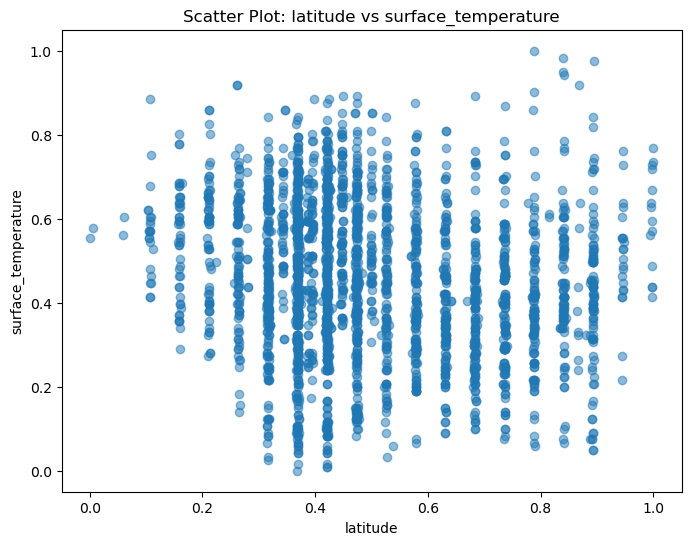

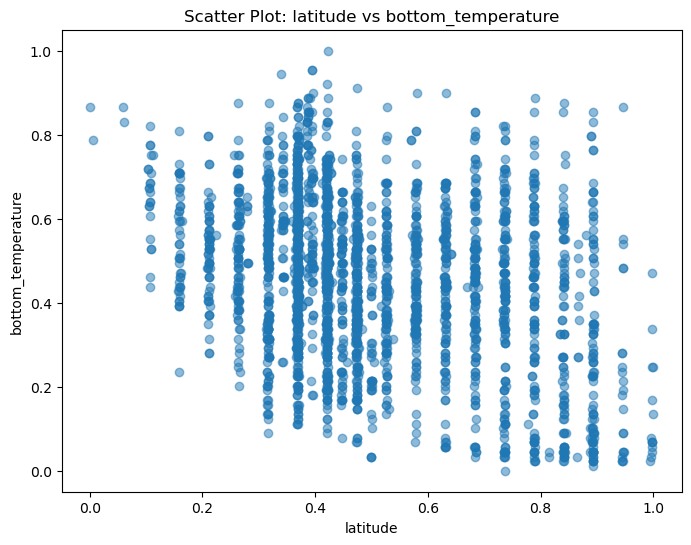

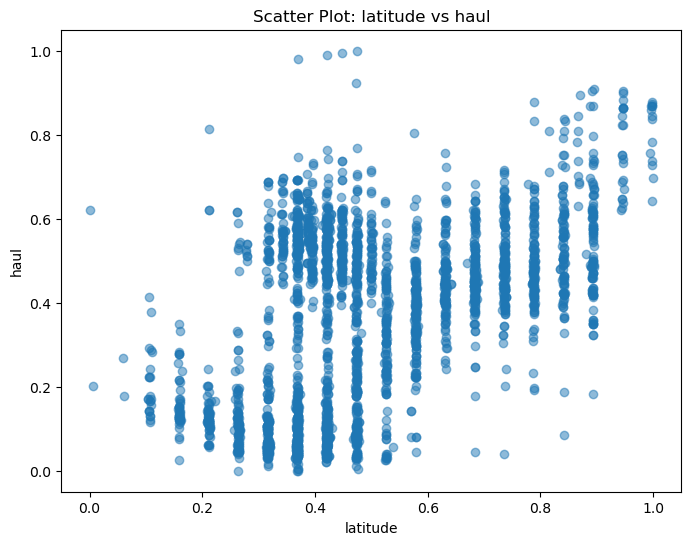

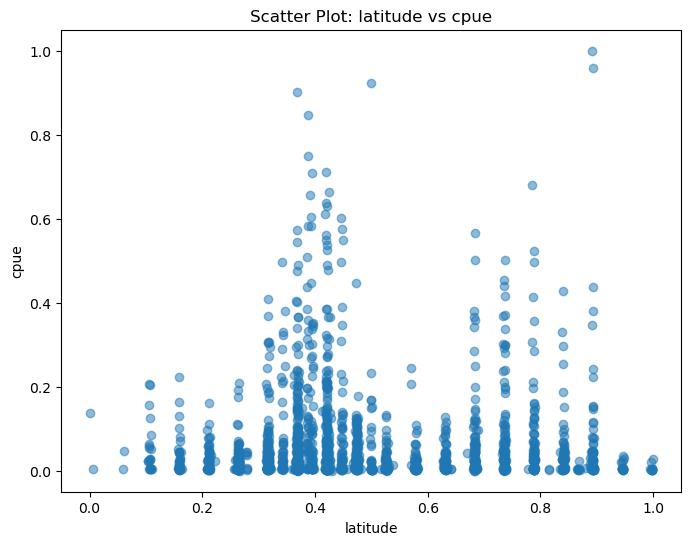

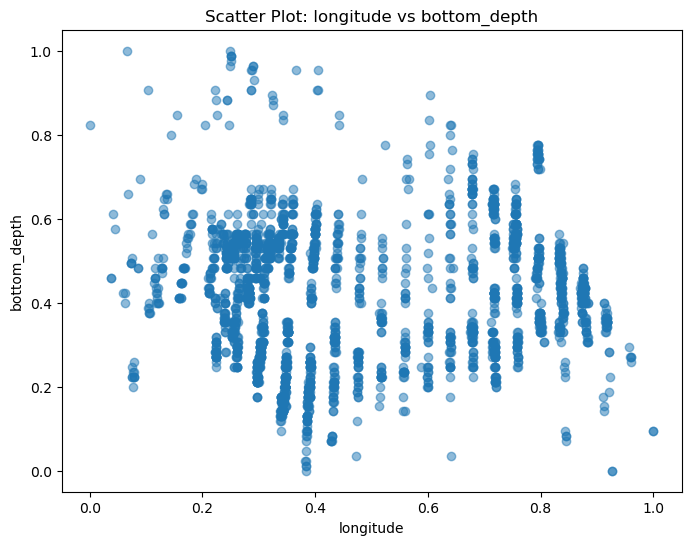

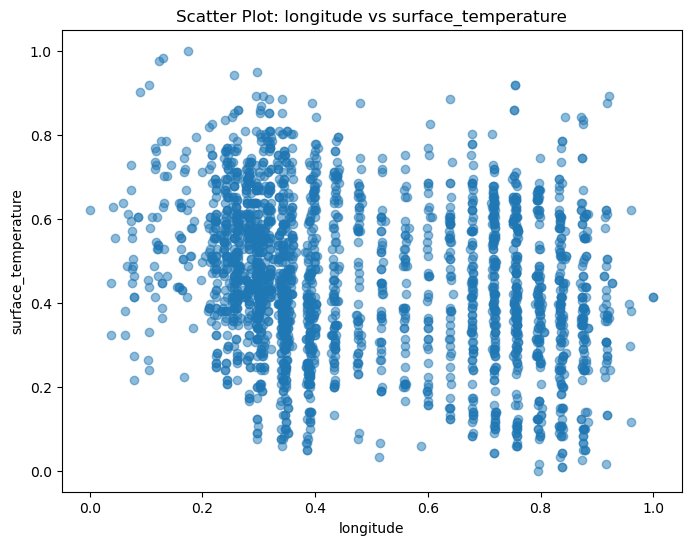

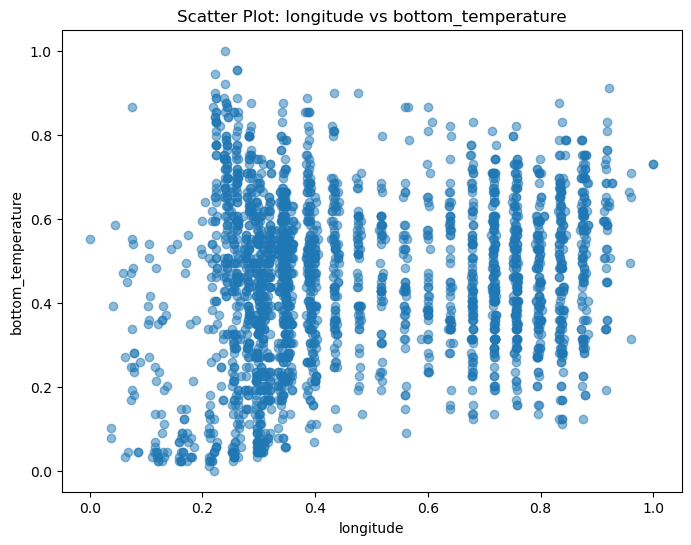

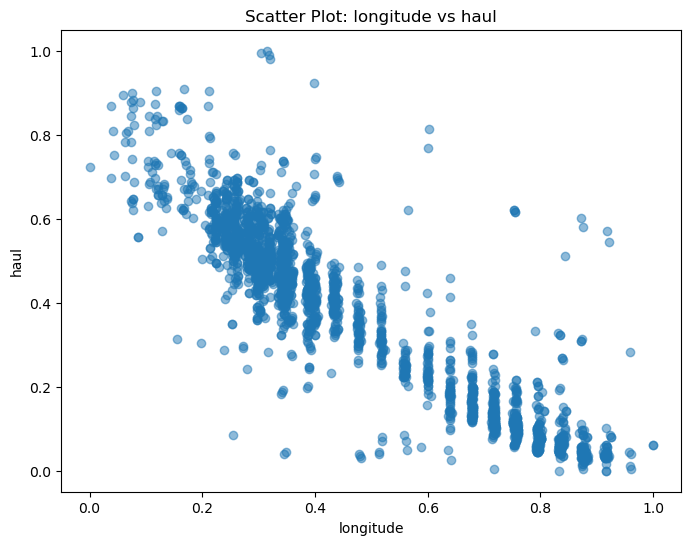

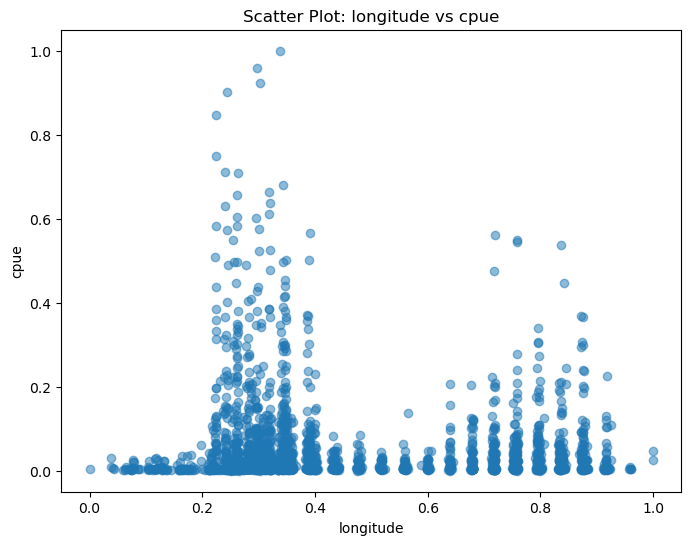

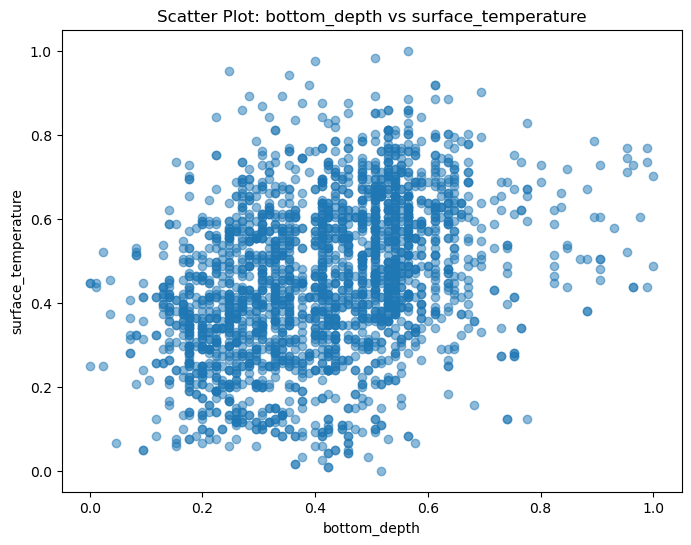

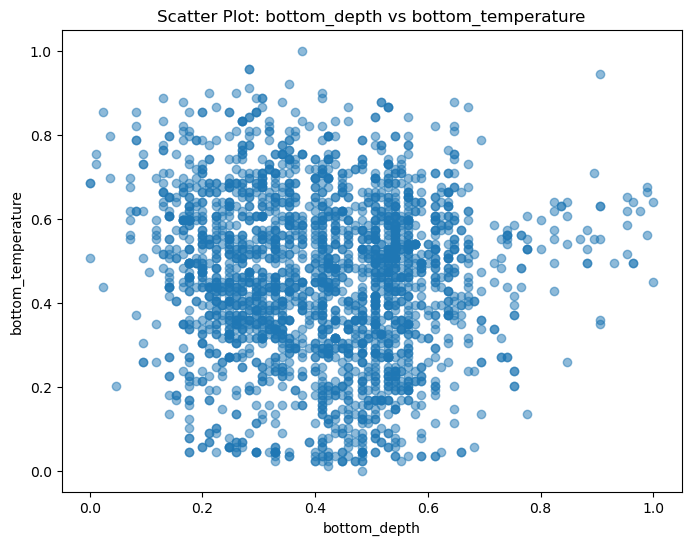

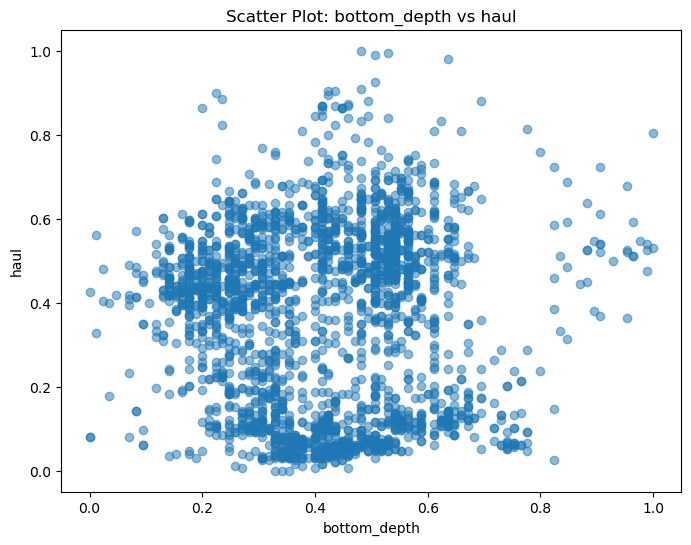

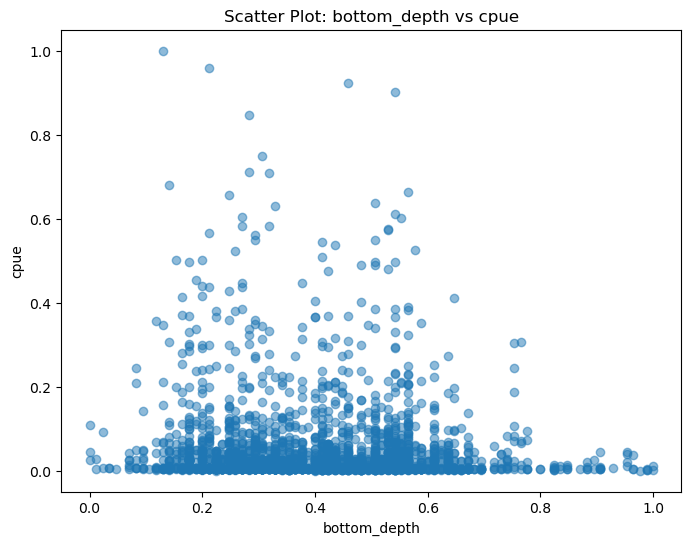

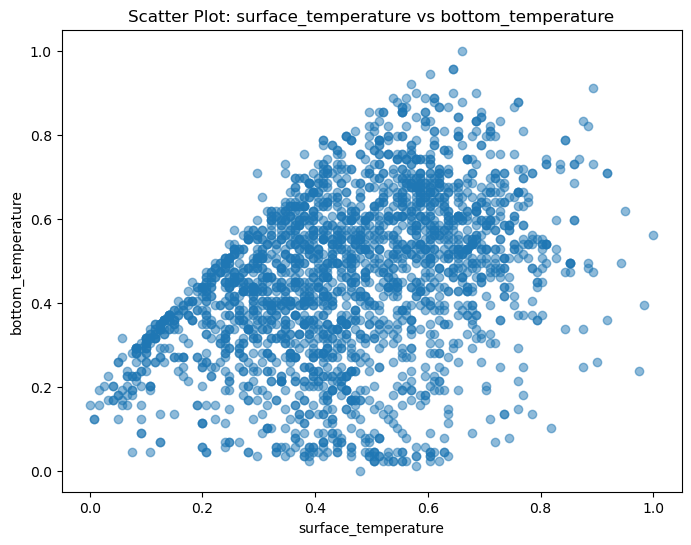

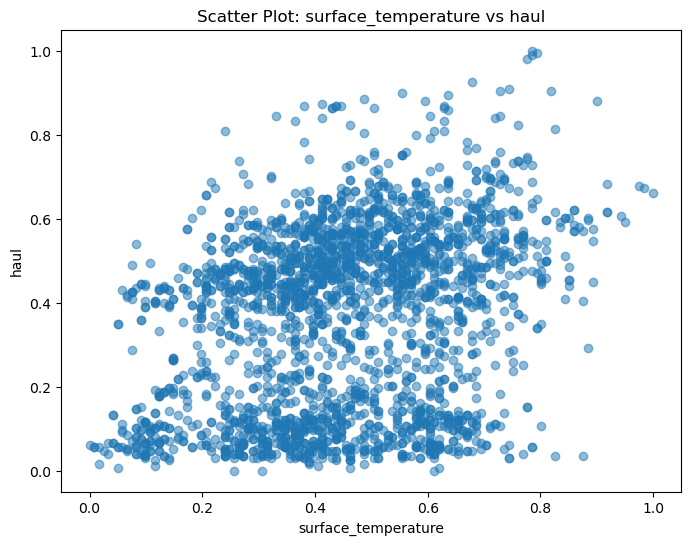

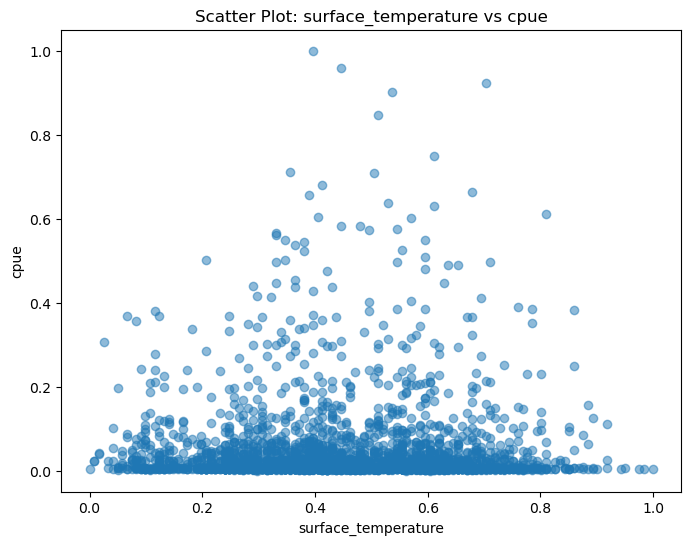

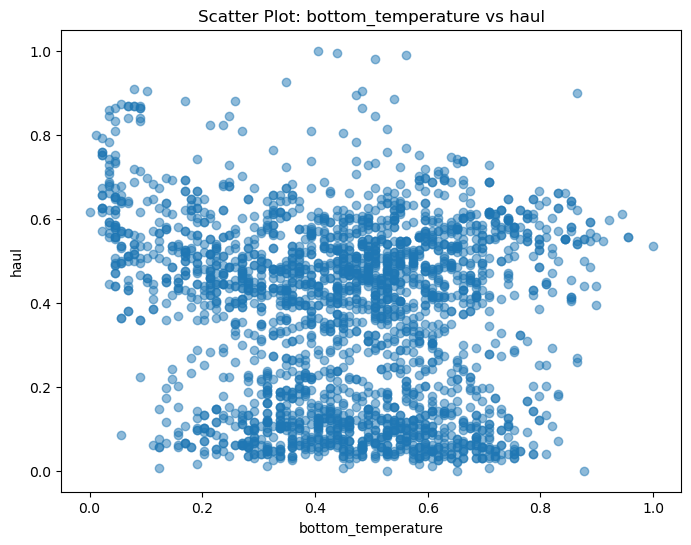

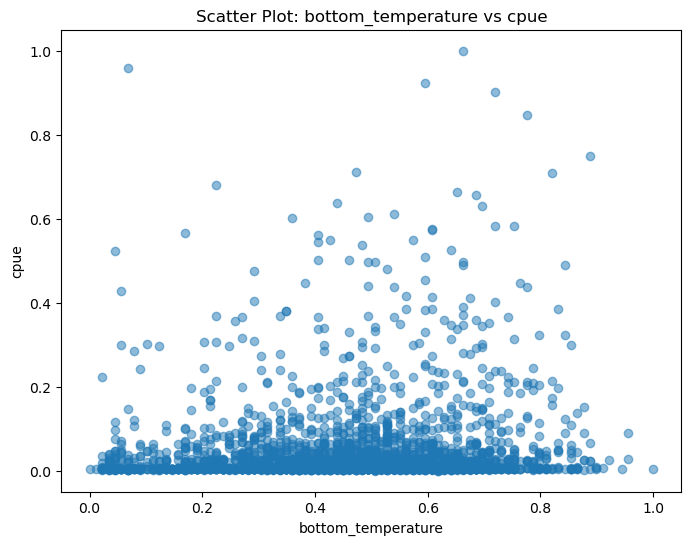

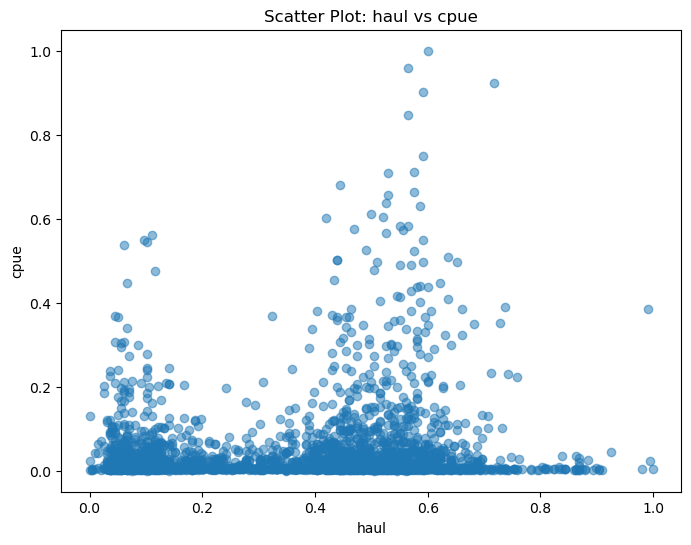

In [182]:
for i in range(len(scatter_columns)):
    for j in range(i + 1, len(scatter_columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(data[scatter_columns[i]], data[scatter_columns[j]], alpha=0.5)
        plt.title(f'Scatter Plot: {scatter_columns[i]} vs {scatter_columns[j]}')
        plt.xlabel(scatter_columns[i])
        plt.ylabel(scatter_columns[j])
        plt.show()

# Correlation matrix

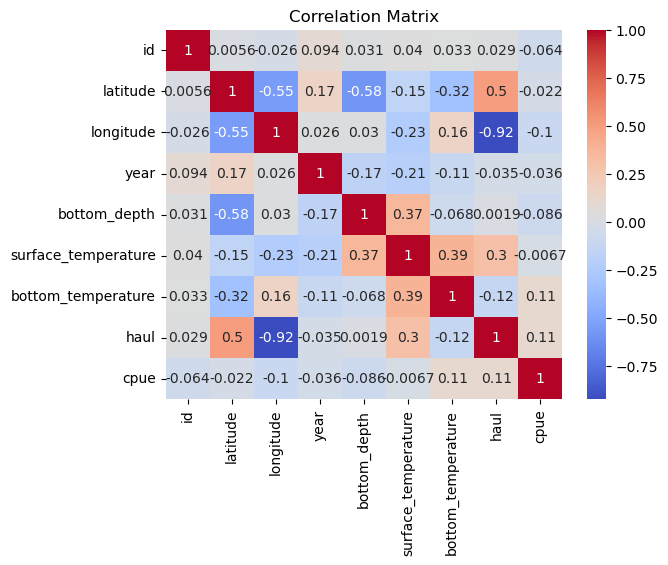

In [183]:
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Machine learning algorithm for data analysis

# Create a decision tree regressor

In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['latitude', 'longitude', 'year', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul']]
y = data['cpue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Regression Test MSE: {mse}")

Decision Tree Regression Test MSE: 0.014626157857630289


MSE provides a measure of how well the model's predictions match the actual data. A lower MSE indicates a better fit, with zero being the ideal value (perfect predictions).

# 5. Neural networks

# Multilayer Perceptron (MLP)

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' is your input features and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Standardize your features for MLP
scaler_mlp = StandardScaler()
X_train_scaled_mlp = scaler_mlp.fit_transform(X_train_2d)
X_test_scaled_mlp = scaler_mlp.transform(X_test_2d)

# Create an MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled_mlp, y_train)

# Make predictions for MLP
mlp_train_predictions = mlp_model.predict(X_train_scaled_mlp)
mlp_test_predictions = mlp_model.predict(X_test_scaled_mlp)

# Evaluate the MLP model
mlp_train_mse = mean_squared_error(y_train, mlp_train_predictions)
mlp_test_mse = mean_squared_error(y_test, mlp_test_predictions)
mlp_test_r2 = r2_score(y_test, mlp_test_predictions)

print(f"MLP Regression Training MSE: {mlp_train_mse}")
print(f"MLP Regression Test MSE: {mlp_test_mse}")
print(f"MLP Regression Test R2 Score: {mlp_test_r2}")

MLP Regression Training MSE: 0.007514404807559621
MLP Regression Test MSE: 0.008588847800870136
MLP Regression Test R2 Score: 0.05843468938657603


A lower MSE indicates a better fit, with zero being the ideal value (perfect predictions)

# Long Short-Term Memory (LSTM) 

In [206]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Assuming 'X' is your sequence data and 'y' is your target variable
# Make sure to reshape X for LSTM input (3D tensor with shape (samples, time steps, features))
X_lstm = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split your data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=2)

# Make predictions
lstm_train_predictions = lstm_model.predict(X_train_lstm)
lstm_test_predictions = lstm_model.predict(X_test_lstm)

# Reshape predictions for evaluation
lstm_train_predictions = lstm_train_predictions.reshape(-1)
lstm_test_predictions = lstm_test_predictions.reshape(-1)

# Convert regression predictions to binary classes
threshold = 0.5
y_test_lstm_binary = (y_test_lstm > threshold).astype(int)
lstm_test_predictions_binary = (lstm_test_predictions > threshold).astype(int)

# Evaluate the model
lstm_train_mse = mean_squared_error(y_train_lstm, lstm_train_predictions)
lstm_test_mse = mean_squared_error(y_test_lstm, lstm_test_predictions)
lstm_test_r2 = r2_score(y_test_lstm, lstm_test_predictions)

print(f"LSTM Regression Training MSE: {lstm_train_mse}")
print(f"LSTM Regression Test MSE: {lstm_test_mse}")
print(f"LSTM Regression Test R2 Score: {lstm_test_r2}")

Epoch 1/50
65/65 - 6s - loss: 0.0126 - 6s/epoch - 92ms/step
Epoch 2/50
65/65 - 0s - loss: 0.0103 - 360ms/epoch - 6ms/step
Epoch 3/50
65/65 - 0s - loss: 0.0103 - 319ms/epoch - 5ms/step
Epoch 4/50
65/65 - 0s - loss: 0.0103 - 314ms/epoch - 5ms/step
Epoch 5/50
65/65 - 0s - loss: 0.0102 - 316ms/epoch - 5ms/step
Epoch 6/50
65/65 - 0s - loss: 0.0103 - 305ms/epoch - 5ms/step
Epoch 7/50
65/65 - 0s - loss: 0.0102 - 315ms/epoch - 5ms/step
Epoch 8/50
65/65 - 0s - loss: 0.0103 - 350ms/epoch - 5ms/step
Epoch 9/50
65/65 - 0s - loss: 0.0103 - 353ms/epoch - 5ms/step
Epoch 10/50
65/65 - 0s - loss: 0.0103 - 332ms/epoch - 5ms/step
Epoch 11/50
65/65 - 0s - loss: 0.0103 - 341ms/epoch - 5ms/step
Epoch 12/50
65/65 - 0s - loss: 0.0103 - 352ms/epoch - 5ms/step
Epoch 13/50
65/65 - 0s - loss: 0.0103 - 351ms/epoch - 5ms/step
Epoch 14/50
65/65 - 0s - loss: 0.0103 - 334ms/epoch - 5ms/step
Epoch 15/50
65/65 - 0s - loss: 0.0103 - 334ms/epoch - 5ms/step
Epoch 16/50
65/65 - 0s - loss: 0.0103 - 376ms/epoch - 6ms/step
Epo

# 7. Analyse the parameters of the machine learning methods on the classification accuracy

Mean Square Error (MSE):
Interpretation: MSE measures the root mean square difference between actual and predicted values. Lower MSE values indicate better performance. In this case, the training and test MSEs are close, suggesting that the model generalizes well to the unseen data.

R2 rating:
The estimate represents the proportion of variance explained by the model. A value close to 0 indicates that the model does not explain much variance and the predictions are not much better than predicting the mean. In this case
the estimates are quite low, suggesting that the model may not capture data variability well enough.
Thus, although the model has a relatively low MSE, indicating good predictive performance in terms of absolute errors, the estimates suggest that the model's ability to explain variance in the target variable is limited. Further analysis and possibly improvement of the model may be required to improve the predictive capabilities


# 8. Comparison of ML methods:

Decision Tree Regression Test MSE: 0.014626157857630289 

MLP Regression Test MSE: 0.008588847800870133               
MLP Regression Test R2 Score: 0.05843468938657603

LSTM Regression Test MSE: 0.00912833975031037        
LSTM Regression Test R2 Score: -0.00015921361888082686

# 9. Conclusions 

After thorough evaluation of various regression models on our dataset, we observed distinct performances. The Decision Tree model yielded the highest Test MSE, indicating suboptimal generalization to unseen data. The MLP and LSTM models, on the other hand, demonstrated competitive performance, with the MLP model slightly outperforming the LSTM in terms of Test MSE.